# Postwork 4. Correlaciones y Regresión Linear Simple

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/COVID-19 Survey Student Responses-clean.csv', index_col=0)
df.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
from sklearn.linear_model import LinearRegression

## Identificar variables numéricas

In [5]:
df_num = df.select_dtypes('number')
df_num.head()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
0,21,2.0,4.0,0.0,7.0,3.0,1.0,4
1,21,0.0,0.0,2.0,10.0,3.0,0.0,3
2,20,7.0,3.0,0.0,6.0,2.0,0.0,3
3,20,3.0,2.0,1.0,6.0,5.0,0.0,3
4,21,3.0,3.0,1.0,8.0,3.0,1.0,4


Los datos están limpios pues ya los habíamos limpiado en el postwork 1. Ahora observamos las correlaciones:

In [6]:
df_num.corr()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
Age of Subject,1.000000,-0.171800,0.008600,-0.055098,-0.116710,0.069938,-0.046519,-0.034250
Time spent on Online Class,-0.171800,1.000000,0.119318,-0.026745,-0.177782,-0.117121,-0.017360,0.003237
Time spent on self study,0.008600,0.119318,1.000000,0.022088,-0.218573,-0.162613,-0.133559,0.065931
Time spent on fitness,-0.055098,-0.026745,0.022088,1.000000,-0.043975,-0.042855,0.012940,0.128537
Time spent on sleep,-0.116710,-0.177782,-0.218573,-0.043975,1.000000,0.085667,0.082910,0.046676
Time spent on social media,0.069938,-0.117121,-0.162613,-0.042855,0.085667,1.000000,0.138199,0.029498
Time spent on TV,-0.046519,-0.017360,-0.133559,0.012940,0.082910,0.138199,1.000000,-0.009189
Number of meals per day,-0.034250,0.003237,0.065931,0.128537,0.046676,0.029498,-0.009189,1.000000


La visualización es más sencilla mediante un mapa de calor:

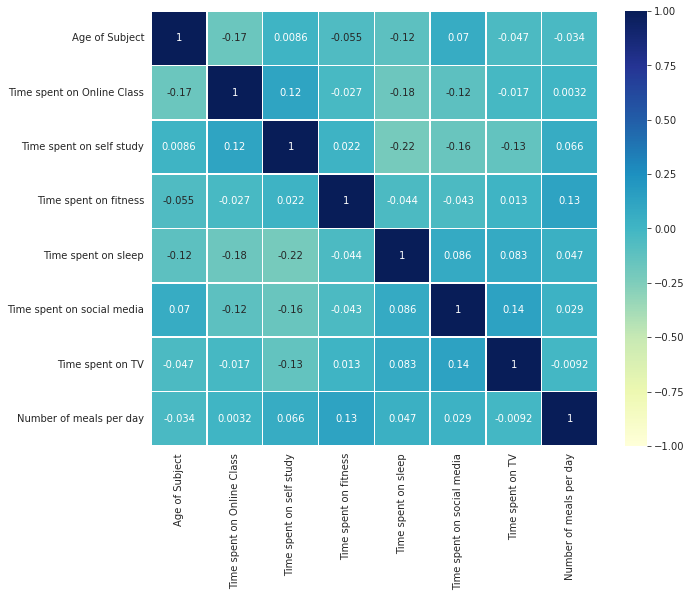

In [7]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

No parece haber mucha correlación entre los datos. Elaboremos un pairplot

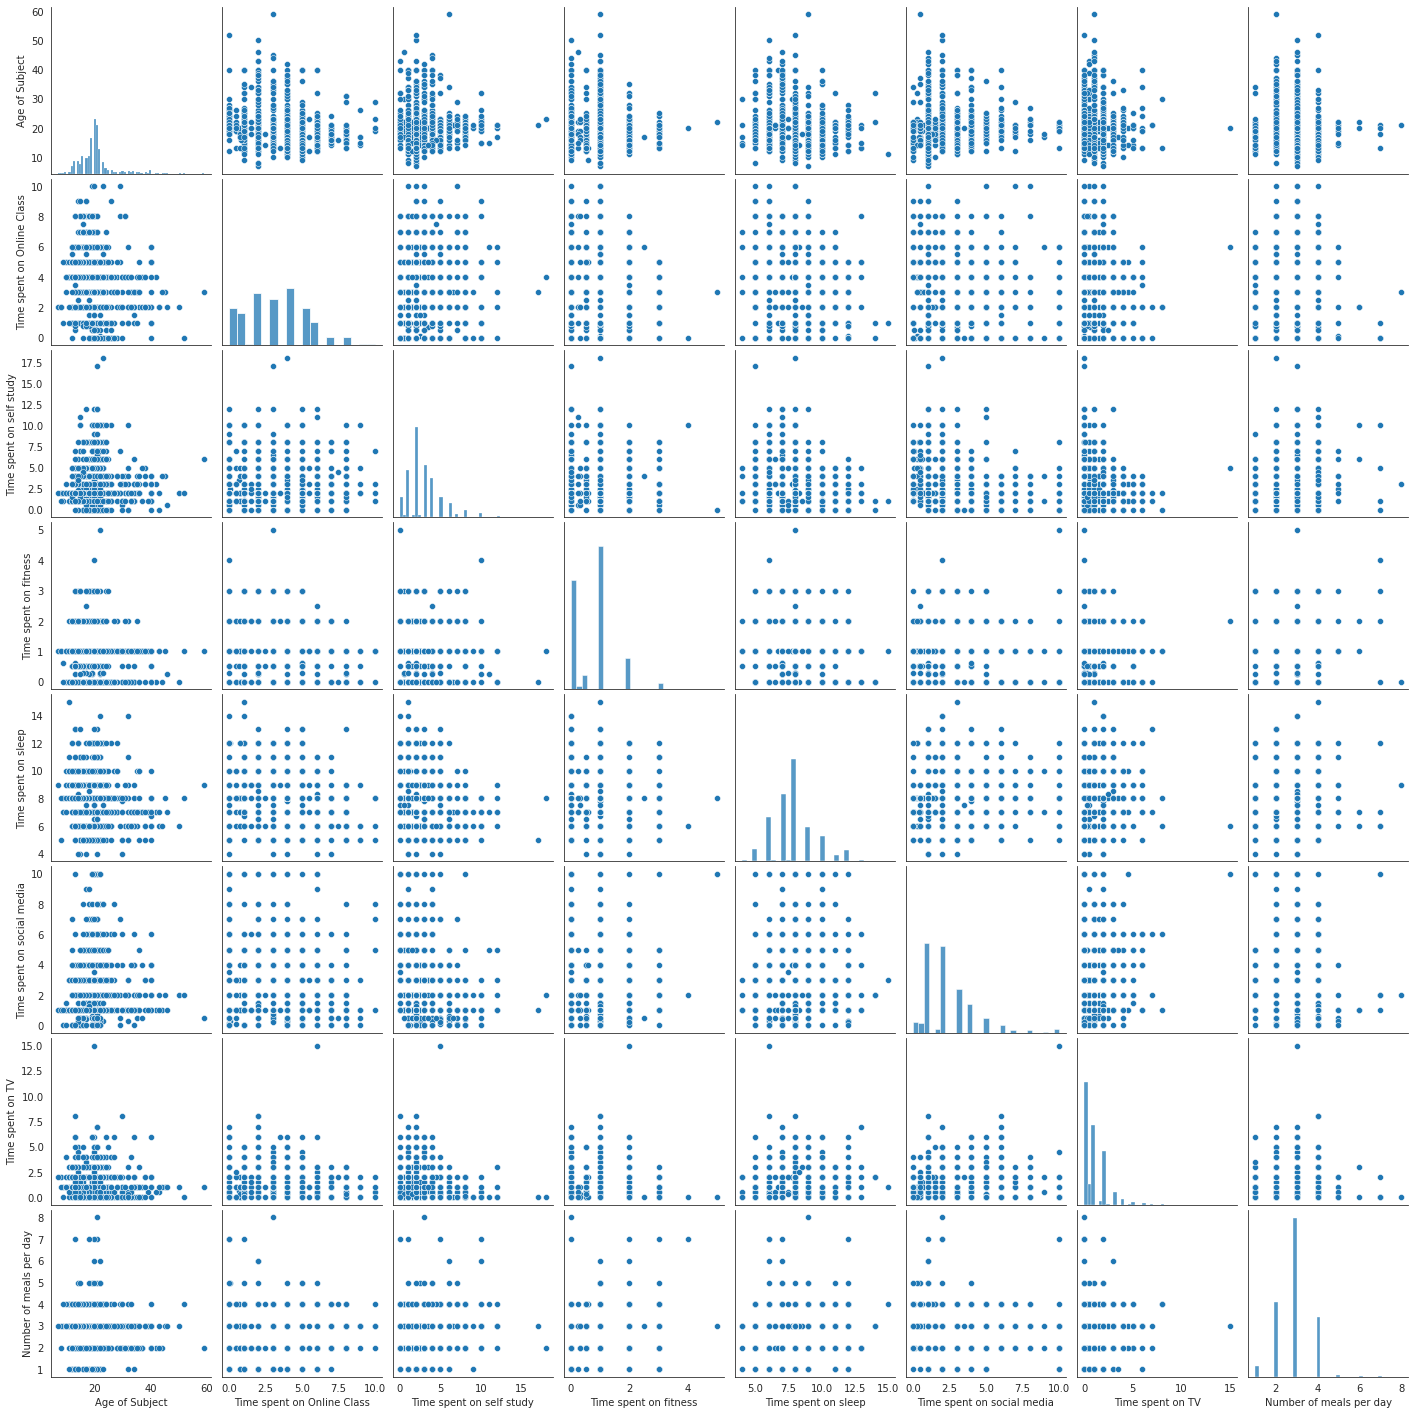

In [8]:
sns.pairplot(df_num);

Aparte de la persona que ve 15 horas de TV, no parece que haya valores atípicos. Aunque no tiene mucho sentido realizar predicciones, practiquemos el método de regresión lineal.

In [9]:
def regresion(df_x, df_y):
  lr = LinearRegression()
  lr.fit(df_x.to_frame(), df_y)
  y_predict = lr.predict(df_x.to_frame())
  sns.scatterplot(x=df_x, y=df_y, s=40);
  sns.lineplot(x=df_x, y=y_predict, color='g');
  print('Coeficiente de Pearson: ',round(lr.score(df_x.to_frame(), df_y),4))

Coeficiente de Pearson:  0.0478


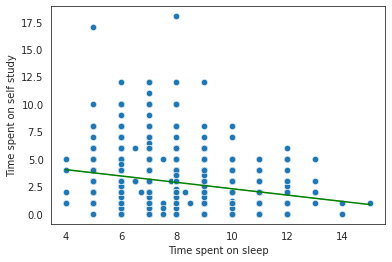

In [10]:
regresion(df_num['Time spent on sleep'],df_num['Time spent on self study'])

Coeficiente de Pearson:  0.0316


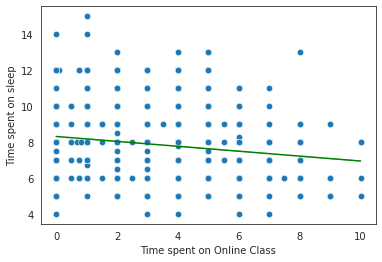

In [11]:
regresion(df_num['Time spent on Online Class'],df_num['Time spent on sleep'])

Coeficiente de Pearson:  0.0295


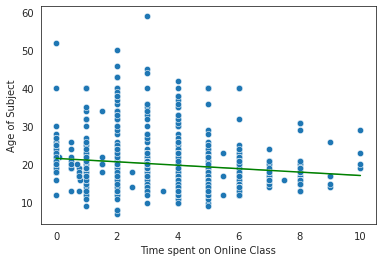

In [12]:
regresion(df_num['Time spent on Online Class'],df_num['Age of Subject'])